# Plotting HHbbWW skims

Ntupler (NanoAOD -> flat ntuple): https://github.com/cmantill/HHBoostedAnalyzer

Location of the HHbbWWNtuples: `/eos/uscms/store/user/cmantill/analyzer/HHToBBWWNtupler/option1/nano/v1/2017/weighted/*.root`

This notebook uses coffea (pip install coffea) and uproot4 and awkward1.
Because coffea's dependencies on uproot and awkward are not up to date we need to call uproot4 and awk1 separately.

In [1]:
import uproot4
import awkward1 as ak

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

Let's explore one file:

In [2]:
evts = uproot4.open("data/HHToBBWWNtuple/weighted/HHToBBVVToBBQQQQ_node_SM_1pb_weighted.root")["tree"]
evts.show() # this will show us the types of the arrays

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
weight               | float                    | AsDtype('>f4')
pileupWeight         | float                    | AsDtype('>f4')
totalWeight          | float                    | AsDtype('>f4')
run                  | uint32_t                 | AsDtype('>u4')
lumi                 | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
npu                  | float                    | AsDtype('>f4')
rho                  | float                    | AsDtype('>f4')
NJets                | int32_t                  | AsDtype('>i4')
MET                  | float                    | AsDtype('>f4')
fatJet1Pt            | float                    | AsDtype('>f4')
fatJet1Eta           | float                    | AsDtype('>f4')
fatJet1Phi           | float                    | AsDtype(

For reference I attach a table to explain the meaning of some of these relevant variables:

| variable             | meaning | 
| -----------          | ----------- |
| weight               | The expected number of events per 1/fb of data (should include the x-section / number of generated events - except for the signal samples where we put temporarily the xsec=1)|
    | pileupWeight         | Weight to match the beam intensity (Pileup is number of interactions in the same bunch crossing) |
    | totalWeight          | The multiplication of weight*pileupWeight (I think) | 
    | run                  | LHC run number | 
    | lumi                 | LHC run period sub section | 
    | event                | LHC collision id |
    | MET                  | Missing transverse energy | 
    | fatJet1Pt            | leading fat jet pT (Large cone Jet w. dR = 0.8) (leading means w the largest pT) |
    | fatJet1Eta           | leading fat jet $\eta$ |
    | fatJet1Phi           | leading fat jet $\phi$ |
    | fatJet1Mass          | leading fat jet mass |
    | fatJet1MassSD        | leading fat jet soft drop mass (groomed mass - cleaning radiation away from jet) |
    | fatJet1DeepAK8H      | leading fat jet deepAK8 H(qqqq) probability score against QCD |
    | fatJet1DeepAK8H4qMD  | leading fat jet deepAK8 H(qqqq) probability score against QCD (mass decorrelated version) |
    | fatJet1PNetXbb       | leading fat jet Particle Net probability score of X particle decaying into pair of b-quarks |
    | fatJet1PNetQCDb      | leading fat jet Particle Net probability score of QCD jets w b-quarks |
    | fatJet1PNetQCDbb     | leading fat jet Particle Net probability score of QCD jets w 2 b-quarks |
    | fatJet1PNetQCDc      | leading fat jet Particle Net probability score of QCD jets w c-quarks |
    | fatJet1PNetQCDcc     | leading fat jet Particle Net probability score of QCD jets w 2 c-quarks |
    | fatJet1PNetQCDothers | leading fat jet Particle Net probability score of QCD jets w other quarks |
    | fatJet1GenMatchIndex | index of the Gen Higgs that this jet is matched to |
    | fatJet1Tau4OverTau3  | leading fat jet n-subjetiness score (probability that jet is consistent w 4 prongs instead of 3) |
    | fatJet1Tau4OverTau2  | leading fat jet n-subjetiness score (probability that jet is consistent w 4 prongs instead of 2) |
    | fatJet1Tau4OverTau1  | leading fat jet n-subjetiness score (probability that jet is consistent w 4 prongs instead of 1) |
    | fatJet1Tau2OverTau1  | leading fat jet n-subjetiness score (probability that jet is consistent w 2 prongs instead of 1) |
    | fatJet1n2b1          | leading fat jet n2 score (probability that jet is consistent w 2 prongs instead of 1 - similar to tau21) |
    | fatJet1lsf3          | leading fat jet lsf score (probability that jet has lepton inside) |
    | fatJet1HasMuon       | leading fat jet has muon inside? |
    | fatJet1HasElectron   | leading fat jet has electron inside? |
    | fatJet1HasBJetCSVLoose | leading fat jet has b-jet inside? - b-jet is indentified w. CSV score (loose working point) |
    | fatJet1HasBJetCSVMedium | leading fat jet has b-jet inside? - b-jet is indentified w. CSV score (medium working point) | 
    | fatJet1HasBJetCSVTight | leading fat jet has b-jet inside? - b-jet is indentified w. CSV score (tight working point) |
    | fatJet1OppositeHemisphereHasBJet | leading fat jet has b-jet in the opposite hemisphere? |
    | fatJet2*             | "" similar properties for jet w second largest pT |
    | fatJet3*             | "" similar properties for jet w third largest pT |
    | jet*                 | "" properties for small cone jets w largest (jet1), second-largest (jet2) and third largest (jet3) pT |
    | genHiggs1*           | properties of generator Higgs 1 in event |
    | genHiggs2*           | properties of generator Higgs 2 in event  |
    
Note:
To build the particle Net probability score of X->bb vs QCD decays `= (fatJet1PNetXbb)/(1-fatJet1PNetQCDb-fatJet1PNetQCDbb-fatJet1PNetQCDc-fatJet1PNetQCDcc-fatJet1PNetQCDothers)`


Now let's make a list of the arrays we want to read.
If we are not reading the QCD samples you can probably make this list as big as possible, but the QCD/ttbar samples are very big so is best to read less arrays - or only the ones you will be working with.

In [3]:
toread = ["fatJet1Pt","fatJet1Eta","fatJet1Phi","fatJet1Mass",
          "fatJet2Pt","fatJet2Eta","fatJet2Phi","fatJet2Mass",
          "fatJet3Pt","fatJet3Eta","fatJet3Phi","fatJet3Mass",
          "genHiggs1Pt","genHiggs1Eta","genHiggs1Phi",
          "genHiggs2Pt","genHiggs2Eta","genHiggs2Phi",
          #"genHiggs1W1Pt","genHiggs1W1Eta","genHiggs1W1Phi","genHiggs1W1M","genHiggs1W1Decay",
          #"genHiggs1W2Pt","genHiggs1W2Eta","genHiggs1W2Phi","genHiggs1W2M","genHiggs1W2Decay",
          #"genHiggs2W1Pt","genHiggs2W1Eta","genHiggs2W1Phi","genHiggs2W1M","genHiggs2W1Decay",
          #"genHiggs2W2Pt","genHiggs2W2Eta","genHiggs2W2Phi","genHiggs2W2M","genHiggs2W2Decay",        
]

def getData(fnames=''):
    evts = uproot4.concatenate(fnames+":tree")
    return evts

Now let's read the data samples. Here I have listed QCD, TTbar and the signal samples. If you are only working with the signal you can comment the others so that the array dictionary is smaller.

In [4]:
samples = {
    "HH4V": "data/HHToBBWWNtuple/weighted/HHToVVVV_node_SM_Pt300_1pb_weighted.root",
    "HHbbWWqq": "data/HHToBBWWNtuple/weighted/HHToBBVVToBBQQQQ_node_SM_1pb_weighted.root",
    "QCD": "data/HHToBBWWNtuple/weighted/QCD_HT*.root",
    "tt": "data/HHToBBWWNtuple/weighted/TTTo*.root",
}

evtDict = {}
for s,fname in samples.items():
    evtDict[s] = getData(fname)

Now let's fill some histograms using coffea. For a nice tutorial see: https://github.com/CoffeaTeam/coffea-hats/blob/master/01-histograms.ipynb

In [5]:
import coffea.hist as hist

hists = {}
hists["jet_pt"] = hist.Hist("Events", 
                             hist.Cat("sample", "Sample"), 
                             hist.Bin("jet1pt", r"Leading Jet $p_T$ ", 40, 200, 2000),
                             hist.Bin("jet2pt", r"Sub-Leading Jet $p_T$", 40, 200, 2000),
                             hist.Bin("jet3pt", r"3rd-Leading Jet $p_T$", 4, 200, 2000))

hists["genHiggs"] = hist.Hist("Events", 
                             hist.Cat("sample", "Sample"), 
                             hist.Bin("h1pt", r"Gen Higgs 1 $p_T$ ", 40, 200, 2000),
                             hist.Bin("h2pt", r"Gen Higgs 2 $p_T$", 40, 200, 2000))

for s,evts in evtDict.items():
    hists["jet_pt"].fill(sample=s,
                         jet1pt = evts["fatJet1Pt"],
                         jet2pt = evts["fatJet2Pt"],
                         jet3pt = evts["fatJet3Pt"],
                         weight = evts["totalWeight"], # weight is a reserved keyword in Hist, and can be added to any fill() call
                        )
    # for gen information we are only interested in looking at signal samples
    if("HH" in s):
        hists["genHiggs"].fill(sample=s,
                               h1pt = evts["genHiggs1Pt"],
                               h2pt = evts["genHiggs2Pt"])

/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/mplhep/plot.py:229: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/mplhep/plot.py:240: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/mplhep/plot.py:243: RuntimeWarning: invalid value encountered in multiply
  _yerr[i] = _yerr[i] * density_arr[i]
/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


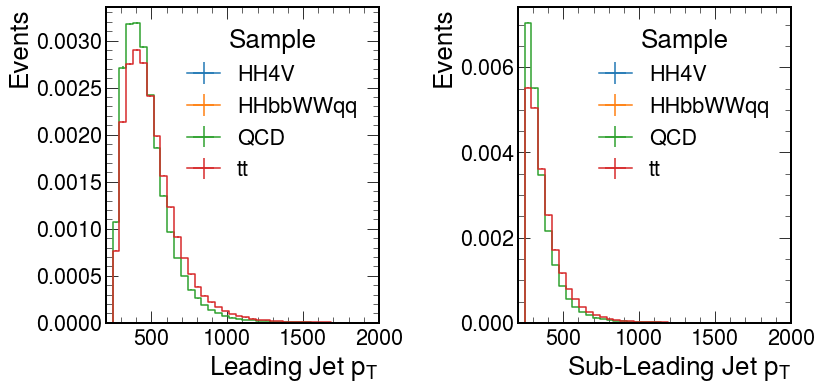

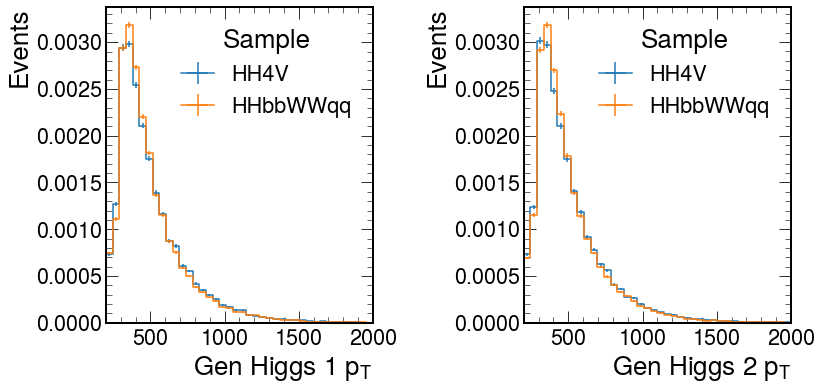

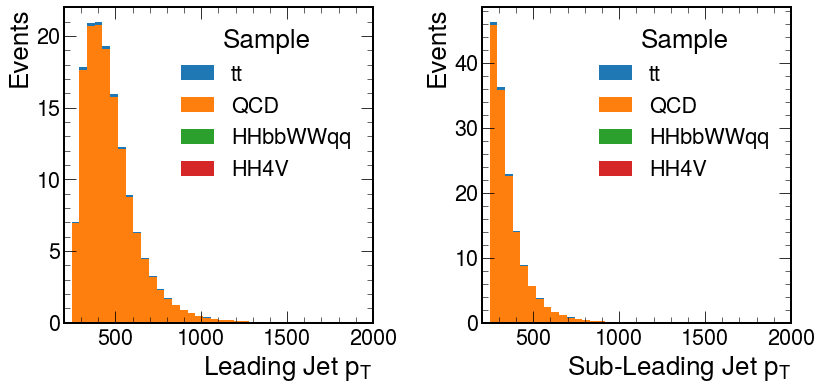

In [6]:
# you can make comparison plots of the shape of histograms
fig, axs = plt.subplots(1,2,figsize=(12,6))
hist.plot1d(hists["jet_pt"].sum("jet2pt", "jet3pt"), overlay='sample',ax=axs[0], density=True);
hist.plot1d(hists["jet_pt"].sum("jet1pt", "jet3pt"), overlay='sample',ax=axs[1], density=True);
fig.tight_layout()

fig, axs = plt.subplots(1,2,figsize=(12,6))
hist.plot1d(hists["genHiggs"].sum("h2pt"), overlay='sample',ax=axs[0], density=True);
hist.plot1d(hists["genHiggs"].sum("h1pt"), overlay='sample',ax=axs[1], density=True);
fig.tight_layout()

# or stack plots
fig, axs = plt.subplots(1,2,figsize=(12,6))
hist.plot1d(hists["jet_pt"].sum("jet2pt", "jet3pt"), overlay='sample',ax=axs[0], stack=True);
hist.plot1d(hists["jet_pt"].sum("jet1pt", "jet3pt"), overlay='sample',ax=axs[1], stack=True);
fig.tight_layout()

Now you can start exploring other variables. And start making selections using masks on the arrays (see awk1 tutorials for masking).

Good starting points:
- fatJet Particle Net score for bb decays of each jet
- fatJet mass
- mass of two fat-jets
- generator variables